<a href="https://colab.research.google.com/github/askulkarni24/Machine-Learning-Predictive-Modelling/blob/main/Assignment4_Features%26DeepLearning_AbhishekKulkarni_ask9103.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Feature Engineering


*   The fourth project is the development of a notebook (code + explanation) that successfully engineers 12 unique types of features, **three** for each type of feature engineering: **transforming**, **interacting**, **mapping**, and **extracting**.
* The second part of the assignment is the development of a **deep learning classification** model to predict the direction of the S&P500 for the dates **2018-01-01—2018-07-12** (test set).
* The feature engineering section is unrelated to the model section, you can develop any features, not just features that would work for deep learning models (later on you can decide which features to use in your model).
*  You also have to uncomment all the example features and make them run successfully  → **every** feature example has some error/s that you have to fix. Please also describe the error you fixed!
*   Note that we *won't* be attempting to measure the quality of every feature (i.e., how much it improves the model), that is slightly too advanced for this course.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.api import OLS
from sklearn.decomposition import TruncatedSVD

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
import warnings
warnings.filterwarnings('ignore')

Preparing the Data

In [ ]:
# preparing our data
raw_prices = pd.read_csv("https://open-data.s3.filebase.com/assetalloc.csv", sep=';', parse_dates=True, index_col='Dates', dayfirst=True)
df = raw_prices.sort_values(by='Dates')
df["target"] = df["SP500"].pct_change().shift(-1)
df["target"] = np.where(df["target"]>0,1,0)
df.head()

,FTSE,EuroStoxx50,SP500,Gold,French-2Y,French-5Y,French-10Y,French-30Y,US-2Y,US-5Y,US-10Y,US-30Y,Russel2000,EuroStox_Small,FTSE_Small,MSCI_EM,CRB,target
Dates,,,,,,,,,,,,,,,,,,
1989-02-01,2039.7,875.47,297.09,392.50,99.081,99.039,99.572,100.000,100.031,100.345,101.080,101.936,154.38,117.50,1636.57,133.584,286.67,0
1989-02-02,2043.4,878.08,296.84,392.00,98.898,99.117,99.278,99.692,100.000,100.314,101.017,101.905,154.94,117.69,1642.94,135.052,287.03,1
1989-02-03,2069.9,884.09,296.97,388.75,98.907,99.002,99.145,99.178,99.812,100.062,100.921,101.718,155.69,118.62,1659.11,137.134,285.63,0
1989-02-06,2044.3,885.49,296.04,388.00,98.484,98.502,98.510,97.739,99.812,100.062,100.794,101.468,155.58,118.89,1656.86,137.037,284.69,1
1989-02-07,2072.8,883.82,299.63,392.75,98.438,98.312,98.292,97.688,99.906,100.251,101.144,102.092,156.84,118.28,1662.76,136.914,284.21,0


### Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split
Y = df.pop("target")
X = df.copy()

X_train = X[X.index.astype(str)<'2018-01-01']
Y_train = Y[X_train.index]
X_test = X[~X.index.isin(X_train.index)]
Y_test = Y[X_test.index]

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

### Transforming

1. Refresh your mind on tranformation methods by going back to the material. I am simply providing 1 example here. 
1. Don't repeat my logarithmic return calculation, develop your own transformation (there are 1000s of types of transformations).
1. In the example I provide, there is also an error that you have to fix. For example, one of the errors below is that you should actually use `np.log1p()`, but there is another one, so watch out! 

In [ ]:
# Example Transforming (has errors) 

# Name: Logarithmic return of FTSE 
# Description: Developing the logarithmic return feature for use within linear models that make normality assumptions. 

def log_transform(df, ticker):
  df[ticker+"_log"] = np.log1p(df[ticker].pct_change())
  df = df.dropna()
  return df

X_train = log_transform(X_train, ticker='FTSE')
X_test = log_transform(X_test, ticker='FTSE')

X_train.head()
# X_test.head()

,FTSE,EuroStoxx50,SP500,Gold,French-2Y,French-5Y,French-10Y,French-30Y,US-2Y,US-5Y,US-10Y,US-30Y,Russel2000,EuroStox_Small,FTSE_Small,MSCI_EM,CRB,FTSE_log
Dates,,,,,,,,,,,,,,,,,,
1989-02-02,2043.4,878.08,296.84,392.00,98.898,99.117,99.278,99.692,100.000,100.314,101.017,101.905,154.94,117.69,1642.94,135.052,287.03,0.001812
1989-02-03,2069.9,884.09,296.97,388.75,98.907,99.002,99.145,99.178,99.812,100.062,100.921,101.718,155.69,118.62,1659.11,137.134,285.63,0.012885
1989-02-06,2044.3,885.49,296.04,388.00,98.484,98.502,98.510,97.739,99.812,100.062,100.794,101.468,155.58,118.89,1656.86,137.037,284.69,-0.012445
1989-02-07,2072.8,883.82,299.63,392.75,98.438,98.312,98.292,97.688,99.906,100.251,101.144,102.092,156.84,118.28,1662.76,136.914,284.21,0.013845
1989-02-08,2096.2,891.81,298.65,390.50,98.558,98.658,98.756,97.893,99.812,100.156,101.016,101.655,157.00,118.73,1681.85,137.027,284.38,0.011226


#### Corrections -
1. Converted the operation (transformation) into a function to be scalable for any column/s. \
2. Changed np.log() to np.log1p() so that we calculate log(1+r) where r is the return. \
3. Dropped the rows with NaN values generated while implementing the pct_change() method. \

****

*We'll keep tracking the changes in X_train dataframe and look at X_train and X_test together at the end.*

#### Transformation 1

The first transformation that we carry out is on the daily return of gold.
The function gld_ret saves the daily returns of gold for a dataframe passed in.
Since gold returns fluctuate significantly everyday, we use standard scaler to transform it to a standard normal distribution: $N ~ (\mu=0,\sigma=1)$

In [ ]:
## Transformation 1

# Name: Gold returns
# Description: Returns on gold are often compared to that of fixed income & equity securities

def gld_ret(df_train, df_test):
  df_train["Gold_Ret"] = np.round(df["Gold"].pct_change(),4)
  df_train = df_train.dropna()
  df_test["Gold_Ret"] = np.round(df["Gold"].pct_change(),4)
  df_test = df_test.dropna()

  # We transform this variable to a standardized scale
  scaler = StandardScaler()
  # We fit our scaler to the training data only
  df_train["GLDRet_scaled"] = np.round(scaler.fit_transform(df_train["Gold_Ret"].values.reshape(-1,1)),4)
  # We transform the test data using parameters obtained above from fitting the training data
  df_test["GLDRet_scaled"] = np.round(scaler.transform(df_test["Gold_Ret"].values.reshape(-1,1)),4)

  return df_train, df_test

X_train, X_test = gld_ret(X_train, X_test)
X_train.head()
# X_test.head()

,FTSE,EuroStoxx50,SP500,Gold,French-2Y,French-5Y,French-10Y,French-30Y,US-2Y,US-5Y,US-10Y,US-30Y,Russel2000,EuroStox_Small,FTSE_Small,MSCI_EM,CRB,FTSE_log,Gold_Ret,GLDRet_scaled
Dates,,,,,,,,,,,,,,,,,,,,
1989-02-02,2043.4,878.08,296.84,392.00,98.898,99.117,99.278,99.692,100.000,100.314,101.017,101.905,154.94,117.69,1642.94,135.052,287.03,0.001812,-0.0013,-0.1546
1989-02-03,2069.9,884.09,296.97,388.75,98.907,99.002,99.145,99.178,99.812,100.062,100.921,101.718,155.69,118.62,1659.11,137.134,285.63,0.012885,-0.0083,-0.8730
1989-02-06,2044.3,885.49,296.04,388.00,98.484,98.502,98.510,97.739,99.812,100.062,100.794,101.468,155.58,118.89,1656.86,137.037,284.69,-0.012445,-0.0019,-0.2162
1989-02-07,2072.8,883.82,299.63,392.75,98.438,98.312,98.292,97.688,99.906,100.251,101.144,102.092,156.84,118.28,1662.76,136.914,284.21,0.013845,0.0122,1.2308
1989-02-08,2096.2,891.81,298.65,390.50,98.558,98.658,98.756,97.893,99.812,100.156,101.016,101.655,157.00,118.73,1681.85,137.027,284.38,0.011226,-0.0057,-0.6062


#### Transformation 2

The second transformation smoothes out the price of S&P500 to reduce the impact of any jumps/gaps in the index level.
We calculate its Exponential Moving Average (EMA) since it assigns a greater weight to the most recent price observations. 
While it assigns lesser weight to past data, it is based on a recursive formula that includes in its calculation all the past data in our price series.

$ EMA_{t} = \alpha Price_{t} + (1-α)EMA_{t-1} $

The smoothing factor is defined as 

$ \alpha = \frac{2}{(n+1)} $

where n is the number of days in our span. In our case we choose 10.

In [ ]:
## Transforming 2

# Name: S&P500 Exponential Moving Average
# Description: Moving Averages smooth out the evolution of prices. 
#              Exponential Average replicates the price trend well than simple average

def ema_(df,window,tick):
  #window: No of days included in calculating EMA
  #tick: Ticker for which EMA is being calculated
  df[tick + "_ema10"] = np.round(df[tick].ewm(span=window).mean(),2)
  return df

X_train = ema_(X_train, window=10, tick='SP500')
X_test = ema_(X_test, window=10, tick='SP500')

X_train.head()
# X_test.head()

,FTSE,EuroStoxx50,SP500,Gold,French-2Y,French-5Y,French-10Y,French-30Y,US-2Y,US-5Y,...,US-30Y,Russel2000,EuroStox_Small,FTSE_Small,MSCI_EM,CRB,FTSE_log,Gold_Ret,GLDRet_scaled,SP500_ema10
Dates,,,,,,,,,,,,,,,,,,,,,
1989-02-02,2043.4,878.08,296.84,392.00,98.898,99.117,99.278,99.692,100.000,100.314,...,101.905,154.94,117.69,1642.94,135.052,287.03,0.001812,-0.0013,-0.1546,296.84
1989-02-03,2069.9,884.09,296.97,388.75,98.907,99.002,99.145,99.178,99.812,100.062,...,101.718,155.69,118.62,1659.11,137.134,285.63,0.012885,-0.0083,-0.8730,296.91
1989-02-06,2044.3,885.49,296.04,388.00,98.484,98.502,98.510,97.739,99.812,100.062,...,101.468,155.58,118.89,1656.86,137.037,284.69,-0.012445,-0.0019,-0.2162,296.56
1989-02-07,2072.8,883.82,299.63,392.75,98.438,98.312,98.292,97.688,99.906,100.251,...,102.092,156.84,118.28,1662.76,136.914,284.21,0.013845,0.0122,1.2308,297.57
1989-02-08,2096.2,891.81,298.65,390.50,98.558,98.658,98.756,97.893,99.812,100.156,...,101.655,157.00,118.73,1681.85,137.027,284.38,0.011226,-0.0057,-0.6062,297.88


#### Transformation 3
The third transformation involves converting the price range of Russell2000 to that of US 10-yr treasury bond prices.
We achieve this using the feature_range argument in the MinMaxScaler. \
Values passed will be the minimum and maximum value of price series US-10Y.

In [ ]:
## Transforming 3 

# Name: Russel2000 rescaling
# Description: Scaling Russel2000 index levels to that of US-10Y bond prices

def rus_rescale(df):
  ts = df["US-10Y"]
  mm_scaler = MinMaxScaler(feature_range=[ts.min(),ts.max()])
  df["Rus_scaled"] = np.round(mm_scaler.fit_transform(df["Russel2000"].values.reshape(-1,1)),2)
  return df

X_train = rus_rescale(X_train)
X_test = rus_rescale(X_test)

X_train.head()
# X_test.head()

,FTSE,EuroStoxx50,SP500,Gold,French-2Y,French-5Y,French-10Y,French-30Y,US-2Y,US-5Y,...,Russel2000,EuroStox_Small,FTSE_Small,MSCI_EM,CRB,FTSE_log,Gold_Ret,GLDRet_scaled,SP500_ema10,Rus_scaled
Dates,,,,,,,,,,,,,,,,,,,,,
1989-02-02,2043.4,878.08,296.84,392.00,98.898,99.117,99.278,99.692,100.000,100.314,...,154.94,117.69,1642.94,135.052,287.03,0.001812,-0.0013,-0.1546,296.84,99.03
1989-02-03,2069.9,884.09,296.97,388.75,98.907,99.002,99.145,99.178,99.812,100.062,...,155.69,118.62,1659.11,137.134,285.63,0.012885,-0.0083,-0.8730,296.91,99.06
1989-02-06,2044.3,885.49,296.04,388.00,98.484,98.502,98.510,97.739,99.812,100.062,...,155.58,118.89,1656.86,137.037,284.69,-0.012445,-0.0019,-0.2162,296.56,99.06
1989-02-07,2072.8,883.82,299.63,392.75,98.438,98.312,98.292,97.688,99.906,100.251,...,156.84,118.28,1662.76,136.914,284.21,0.013845,0.0122,1.2308,297.57,99.11
1989-02-08,2096.2,891.81,298.65,390.50,98.558,98.658,98.756,97.893,99.812,100.156,...,157.00,118.73,1681.85,137.027,284.38,0.011226,-0.0057,-0.6062,297.88,99.12


---

### Interacting

There are millions of possible interaction methods, be creative and come up with your own. For this assignment there is no 'right' feature engineering method, you simply develop one, and give it a name and a discreption.

In [ ]:
# Example Interacting (has errors) 

# Name: Ratio of Gold return to 10Y treasury
# Desciption: Both gold and treasuries are safe-haven assets and descrepency in their ratio could be a sign of some marco-economic event.

def gold_to_yield(df):
  teny_returns = df["US-10Y"].pct_change()
  gold_returns = df["Gold"].pct_change()
  #df = df.dropna()
  df["gold_r__div__teny_r"] = (1+gold_returns)/(1+teny_returns)
  df = df.dropna()
  return df

X_train = gold_to_yield(X_train) 
X_test = gold_to_yield(X_test)

X_train.head()
# X_test.head()

,FTSE,EuroStoxx50,SP500,Gold,French-2Y,French-5Y,French-10Y,French-30Y,US-2Y,US-5Y,...,EuroStox_Small,FTSE_Small,MSCI_EM,CRB,FTSE_log,Gold_Ret,GLDRet_scaled,SP500_ema10,Rus_scaled,gold_r__div__teny_r
Dates,,,,,,,,,,,,,,,,,,,,,
1989-02-03,2069.9,884.09,296.97,388.75,98.907,99.002,99.145,99.178,99.812,100.062,...,118.62,1659.11,137.134,285.63,0.012885,-0.0083,-0.8730,296.91,99.06,0.992653
1989-02-06,2044.3,885.49,296.04,388.00,98.484,98.502,98.510,97.739,99.812,100.062,...,118.89,1656.86,137.037,284.69,-0.012445,-0.0019,-0.2162,296.56,99.06,0.999328
1989-02-07,2072.8,883.82,299.63,392.75,98.438,98.312,98.292,97.688,99.906,100.251,...,118.28,1662.76,136.914,284.21,0.013845,0.0122,1.2308,297.57,99.11,1.008739
1989-02-08,2096.2,891.81,298.65,390.50,98.558,98.658,98.756,97.893,99.812,100.156,...,118.73,1681.85,137.027,284.38,0.011226,-0.0057,-0.6062,297.88,99.12,0.995531
1989-02-09,2079.1,889.28,296.06,394.25,98.558,98.582,98.718,97.893,99.781,99.779,...,119.02,1685.32,137.093,285.47,-0.008191,0.0096,0.9639,297.41,99.10,1.019219


#### Corrections -
1. Calculating gold returns using .pct_change() method. \
2. Dropping all rows with NaN values. \
3. The ratio should be $\frac{(1+x)}{(1+y)}$ and not $\frac{x}{y}$; $x$ being gold_returns and $y$ being teny_returns.

--------------------------------------------

#### Interaction 1
As a first example of interaction, we create the famous Moving Average Convergence Divergence (MACD) indicator.  \

**We will consider the interaction between 2 features not present in the original dataset (12-day EMA & 25-day EMA).** \

The feature we generate is an output value of either 1 or -1. \

\
Interpretation - \
$-1$ shows the time when 12-day EMA < 25-day EMA and one can go short on (sell) MSCI Emerging Markets Index. \
$1$ shows the time when 12-day EMA > 25-day EMA and one can go long on (buy) MSCI Emerging Markets Index.

In [ ]:
## Interacting 1 (Add code below)

# Name: Moving Average Convergence Divergence (MACD) for MSCI_EM
# Description: Technical Indicator showing the trend in an oscillating phase of prices

def macd(df,tick):
  ema12 = np.round(df[tick].ewm(span=12).mean(),2) # 12-day EMA
  ema25 = np.round(df[tick].ewm(span=25).mean(),2) # 25-day EMA  
  macd = []
  
  for i in range(len(ema12)):
    if ema12[i] > ema25[i]:
      macd.append(1)   # Buy if the shorter average is greater 
    else:
      macd.append(-1)  # Short if the shorter average is smaller
  
  df["MACD"] = macd
  return df

X_train = macd(X_train, tick="MSCI_EM")
X_test = macd(X_test, tick="MSCI_EM")

X_train.head()
# X_test.head()

,FTSE,EuroStoxx50,SP500,Gold,French-2Y,French-5Y,French-10Y,French-30Y,US-2Y,US-5Y,...,FTSE_Small,MSCI_EM,CRB,FTSE_log,Gold_Ret,GLDRet_scaled,SP500_ema10,Rus_scaled,gold_r__div__teny_r,MACD
Dates,,,,,,,,,,,,,,,,,,,,,
1989-02-03,2069.9,884.09,296.97,388.75,98.907,99.002,99.145,99.178,99.812,100.062,...,1659.11,137.134,285.63,0.012885,-0.0083,-0.8730,296.91,99.06,0.992653,-1
1989-02-06,2044.3,885.49,296.04,388.00,98.484,98.502,98.510,97.739,99.812,100.062,...,1656.86,137.037,284.69,-0.012445,-0.0019,-0.2162,296.56,99.06,0.999328,-1
1989-02-07,2072.8,883.82,299.63,392.75,98.438,98.312,98.292,97.688,99.906,100.251,...,1662.76,136.914,284.21,0.013845,0.0122,1.2308,297.57,99.11,1.008739,-1
1989-02-08,2096.2,891.81,298.65,390.50,98.558,98.658,98.756,97.893,99.812,100.156,...,1681.85,137.027,284.38,0.011226,-0.0057,-0.6062,297.88,99.12,0.995531,-1
1989-02-09,2079.1,889.28,296.06,394.25,98.558,98.582,98.718,97.893,99.781,99.779,...,1685.32,137.093,285.47,-0.008191,0.0096,0.9639,297.41,99.10,1.019219,-1


#### Interaction 2
The second example of interaction calculates the correlation between the US-10Y bond prices and the Eurostoxx50 to gauge the influence of US economy on European markets. \
A strong correlation at one point of time can highlight the need for hedging one's position in European equity markets during a turbluent time in US economy - something like a Fed meet or release of economic statistics. \
We calculate the correlation between the 2 data sets in a rolling manner with a window size of 10 days. In order to retain maximum data, we fill the first empty cells with a value of 1.

In [ ]:
## Interacting 2 (Add code below)

# Name: Correlation of Levels
# Description: Correlation between Gold Prices and US-10Y Bond Prices

def correlation(df,window,x,y):
  df["Corr_"+x+y] = df[x].rolling(window).corr(df[y]).fillna(1)
  return df

X_train = correlation(X_train, window=10, x="US-10Y", y="EuroStoxx50")
X_test = correlation(X_test, window=10, x="US-10Y", y="EuroStoxx50")

X_train.head()
# X_test.head()

,FTSE,EuroStoxx50,SP500,Gold,French-2Y,French-5Y,French-10Y,French-30Y,US-2Y,US-5Y,...,MSCI_EM,CRB,FTSE_log,Gold_Ret,GLDRet_scaled,SP500_ema10,Rus_scaled,gold_r__div__teny_r,MACD,Corr_US-10YEuroStoxx50
Dates,,,,,,,,,,,,,,,,,,,,,
1989-02-03,2069.9,884.09,296.97,388.75,98.907,99.002,99.145,99.178,99.812,100.062,...,137.134,285.63,0.012885,-0.0083,-0.8730,296.91,99.06,0.992653,-1,1.0
1989-02-06,2044.3,885.49,296.04,388.00,98.484,98.502,98.510,97.739,99.812,100.062,...,137.037,284.69,-0.012445,-0.0019,-0.2162,296.56,99.06,0.999328,-1,1.0
1989-02-07,2072.8,883.82,299.63,392.75,98.438,98.312,98.292,97.688,99.906,100.251,...,136.914,284.21,0.013845,0.0122,1.2308,297.57,99.11,1.008739,-1,1.0
1989-02-08,2096.2,891.81,298.65,390.50,98.558,98.658,98.756,97.893,99.812,100.156,...,137.027,284.38,0.011226,-0.0057,-0.6062,297.88,99.12,0.995531,-1,1.0
1989-02-09,2079.1,889.28,296.06,394.25,98.558,98.582,98.718,97.893,99.781,99.779,...,137.093,285.47,-0.008191,0.0096,0.9639,297.41,99.10,1.019219,-1,1.0


#### Interaction 3
In our third interaction, we calculate the Market Risk Premium used in the famous CAPM equation. It is simply nothing but the Expected return on the market over the risk-free rate. \
$CAPM: E[R_{i}] = R_{F} + β_{i}(E[R_{M}]-R_{F})$ \
We consider the US-10Y daily return as the risk free-rate and expected return on the market will be the simple moving average of the last 10 days for S&P500.

In [ ]:
## Interacting 3 (Add code below)

# Name: US Equity Market Risk Premium
# Description: Expected return on the market over the risk-free rate 

def mkt_rsk_prem(df):
  SP_daily_ret = np.round(df["SP500"].pct_change().fillna(0),4)
  sma10 = np.round(SP_daily_ret.rolling(window=10).mean().fillna(0),4)
  Rf = np.round(df["US-10Y"].pct_change().fillna(0),4)
  df["MktRisk_prem"] = sma10-Rf

  return df

X_train = mkt_rsk_prem(X_train)
X_test = mkt_rsk_prem(X_test)

X_train.head()
# X_test.head()

,FTSE,EuroStoxx50,SP500,Gold,French-2Y,French-5Y,French-10Y,French-30Y,US-2Y,US-5Y,...,CRB,FTSE_log,Gold_Ret,GLDRet_scaled,SP500_ema10,Rus_scaled,gold_r__div__teny_r,MACD,Corr_US-10YEuroStoxx50,MktRisk_prem
Dates,,,,,,,,,,,,,,,,,,,,,
1989-02-03,2069.9,884.09,296.97,388.75,98.907,99.002,99.145,99.178,99.812,100.062,...,285.63,0.012885,-0.0083,-0.8730,296.91,99.06,0.992653,-1,1.0,0.0000
1989-02-06,2044.3,885.49,296.04,388.00,98.484,98.502,98.510,97.739,99.812,100.062,...,284.69,-0.012445,-0.0019,-0.2162,296.56,99.06,0.999328,-1,1.0,0.0013
1989-02-07,2072.8,883.82,299.63,392.75,98.438,98.312,98.292,97.688,99.906,100.251,...,284.21,0.013845,0.0122,1.2308,297.57,99.11,1.008739,-1,1.0,-0.0035
1989-02-08,2096.2,891.81,298.65,390.50,98.558,98.658,98.756,97.893,99.812,100.156,...,284.38,0.011226,-0.0057,-0.6062,297.88,99.12,0.995531,-1,1.0,0.0013
1989-02-09,2079.1,889.28,296.06,394.25,98.558,98.582,98.718,97.893,99.781,99.779,...,285.47,-0.008191,0.0096,0.9639,297.41,99.10,1.019219,-1,1.0,0.0094


### Mapping

This one is slightly harder, you have to identify other  dimensionality reduction methods, there are many more than just PCA. Maybe you can also look at performing the decompositions just on a single asset classes, e.g., US-2Y, US-5Y, US-10Y, US-30Y is a fixed income asset class, but there are a few others in the dataset.

In [ ]:
# Example Mapping (has errors) 

# Name: First prinicipal component of all of the assets returns
# Description:For stocks the first component resmbles the return of the market, for multiple asset classes it could resemble a 'universal' asset class


from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

def pca_first(df_train, df_test, ticks):
  sc = StandardScaler() 

  df_train_s = pd.DataFrame(sc.fit_transform(df_train[ticks].fillna(0)),
                           columns = ticks,
                           index = df_train.index)
  df_test_s = pd.DataFrame(sc.transform(df_test[ticks].fillna(0)),
                           columns = ticks,
                           index = df_test.index)

  pca = PCA(1)
  df_train["PCA1"] = pca.fit_transform(df_train_s.fillna(0))
  df_test["PCA1"] = pca.transform(df_test_s.fillna(0))

  return df_train, df_test

pca_ticks = ["FTSE","EuroStoxx50","Gold","French-10Y","US-10Y","MSCI_EM","CRB"]
X_train, X_test = pca_first(X_train, X_test, pca_ticks)
X_train.head()
# X_test.head()

,FTSE,EuroStoxx50,SP500,Gold,French-2Y,French-5Y,French-10Y,French-30Y,US-2Y,US-5Y,...,FTSE_log,Gold_Ret,GLDRet_scaled,SP500_ema10,Rus_scaled,gold_r__div__teny_r,MACD,Corr_US-10YEuroStoxx50,MktRisk_prem,PCA1
Dates,,,,,,,,,,,,,,,,,,,,,
1989-02-03,2069.9,884.09,296.97,388.75,98.907,99.002,99.145,99.178,99.812,100.062,...,0.012885,-0.0083,-0.8730,296.91,99.06,0.992653,-1,1.0,0.0000,-3.254308
1989-02-06,2044.3,885.49,296.04,388.00,98.484,98.502,98.510,97.739,99.812,100.062,...,-0.012445,-0.0019,-0.2162,296.56,99.06,0.999328,-1,1.0,0.0013,-3.276178
1989-02-07,2072.8,883.82,299.63,392.75,98.438,98.312,98.292,97.688,99.906,100.251,...,0.013845,0.0122,1.2308,297.57,99.11,1.008739,-1,1.0,-0.0035,-3.261839
1989-02-08,2096.2,891.81,298.65,390.50,98.558,98.658,98.756,97.893,99.812,100.156,...,0.011226,-0.0057,-0.6062,297.88,99.12,0.995531,-1,1.0,0.0013,-3.252628
1989-02-09,2079.1,889.28,296.06,394.25,98.558,98.582,98.718,97.893,99.781,99.779,...,-0.008191,0.0096,0.9639,297.41,99.10,1.019219,-1,1.0,0.0094,-3.273017


#### Corrections -
1. StandardScaler.fit_transform returns a numpy array, but we need X_train_s to be a DataFrame to apply fillna() method. Hence we convert the output of .fit_transform method to a dataframe. Applied the same to X_test_s while using the .transform() method. \
2. The functions were generalized to take any dataframes df_train and df_test instead of X_train and X_test. \
3. A list of tickers must be sent in the function for including the specific features on which PCA needs to be applied.

****

Since the exercise of mapping is mostly about Dimensionality Reduction, we have applied 3 most popular Linear Dimensionality Reduction Techniques besides Principal Component Analysis, namely - \
1) Truncated Singular Value Decomposition \
2) Factor Analysis \
3) Linear Discriminant Analysis 

Although the goal and use for all the techniques for the three methods is the same, the underlying mathematics is quite different. We have included links to relevant sources that try to explain the underlying calculations in each method.

### Mapping 1

#### Singular Value Decomposition

This method performs linear dimensionality reduction by means of truncated singular value decomposition (SVD). Truncated SVD can also be used with dense data. A key difference between truncated SVD and PCA is that factorization for SVD is done on the data matrix while factorization for PCA is done on the covariance matrix.

The detailed math behind the algorithm can be found [here](https://en.wikipedia.org/wiki/Singular_value_decomposition).

In [ ]:
## Mapping 1 

# Name: Truncated Singular Value Decomposition
# Description: Linear dimensionality reduction by means of truncated singular value decomposition (SVD)

def truncatedSVD(df_train, df_test, ticks):
  sc = StandardScaler()

  X_train_scaled = pd.DataFrame(sc.fit_transform(X_train[ticks].fillna(0)),
                                columns = ticks,
                                index = X_train.index)
  X_test_scaled = pd.DataFrame(sc.transform(X_test[ticks].fillna(0)),
                               columns = ticks,
                               index = X_test.index)

  tsvd = TruncatedSVD(n_components=1, random_state=42)
  X_train["TSVD"] = tsvd.fit_transform(X_train_scaled.fillna(0))
  X_test["TSVD"] = tsvd.transform(X_test_scaled.fillna(0))

  return X_train, X_test

svd_ticks = ["US-2Y","US-5Y","US-10Y","US-30Y"]
X_train, X_test = truncatedSVD(X_train, X_test, svd_ticks)

X_train.head()
# X_test

,FTSE,EuroStoxx50,SP500,Gold,French-2Y,French-5Y,French-10Y,French-30Y,US-2Y,US-5Y,...,Gold_Ret,GLDRet_scaled,SP500_ema10,Rus_scaled,gold_r__div__teny_r,MACD,Corr_US-10YEuroStoxx50,MktRisk_prem,PCA1,TSVD
Dates,,,,,,,,,,,,,,,,,,,,,
1989-02-03,2069.9,884.09,296.97,388.75,98.907,99.002,99.145,99.178,99.812,100.062,...,-0.0083,-0.8730,296.91,99.06,0.992653,-1,1.0,0.0000,-3.254308,-3.137526
1989-02-06,2044.3,885.49,296.04,388.00,98.484,98.502,98.510,97.739,99.812,100.062,...,-0.0019,-0.2162,296.56,99.06,0.999328,-1,1.0,0.0013,-3.276178,-3.147184
1989-02-07,2072.8,883.82,299.63,392.75,98.438,98.312,98.292,97.688,99.906,100.251,...,0.0122,1.2308,297.57,99.11,1.008739,-1,1.0,-0.0035,-3.261839,-3.110670
1989-02-08,2096.2,891.81,298.65,390.50,98.558,98.658,98.756,97.893,99.812,100.156,...,-0.0057,-0.6062,297.88,99.12,0.995531,-1,1.0,0.0013,-3.252628,-3.133234
1989-02-09,2079.1,889.28,296.06,394.25,98.558,98.582,98.718,97.893,99.781,99.779,...,0.0096,0.9639,297.41,99.10,1.019219,-1,1.0,0.0094,-3.273017,-3.213199


#### Mapping 2

Factor Analysis

The main objective of Factor Analysis is not to just reduce the dimensionality of the data. It is a useful approach to find latent variables which are not directly measured in a single variable but rather inferred from other variables in the dataset. These latent variables are called factors.

We perform Factor Analysis on the 4 French bonds to understand the price action in the French Treasuries market and pass in a single input to our model.

The detailed math behind the algorithm can be found [here](https://www.cs.princeton.edu/~bee/courses/scribe/lec_10_02_2013.pdf).

In [ ]:
pip install factor_analyzer

In [ ]:
## Mapping 2 

# Name: Factor Analysis
# Description: Developing a single (1) Latent variable using Factor Analysis

from factor_analyzer import FactorAnalyzer

def fact_analysis(X_train, X_test,ticks):
  sc = StandardScaler()

  X_train_scaled = pd.DataFrame(sc.fit_transform(X_train[ticks].fillna(0)),
                                columns = ticks,
                                index = X_train.index)
  X_test_scaled = pd.DataFrame(sc.transform(X_test[ticks].fillna(0)),
                               columns = ticks,
                               index = X_test.index)

  fa = FactorAnalyzer(n_factors=1, 
                      rotation="varimax", 
                      method="principal", 
                      is_corr_matrix=False)
  
  X_train["FA1"] = fa.fit_transform(X_train_scaled.fillna(0))
  X_test["FA1"] = fa.transform(X_test_scaled.fillna(0))

  return X_train, X_test

fa_ticks = ["French-2Y","French-5Y","French-10Y","French-30Y"]
X_train, X_test = fact_analysis(X_train, X_test, fa_ticks)

X_train.head()
# X_test.head()

,FTSE,EuroStoxx50,SP500,Gold,French-2Y,French-5Y,French-10Y,French-30Y,US-2Y,US-5Y,...,GLDRet_scaled,SP500_ema10,Rus_scaled,gold_r__div__teny_r,MACD,Corr_US-10YEuroStoxx50,MktRisk_prem,PCA1,TSVD,FA1
Dates,,,,,,,,,,,,,,,,,,,,,
1989-02-03,2069.9,884.09,296.97,388.75,98.907,99.002,99.145,99.178,99.812,100.062,...,-0.8730,296.91,99.06,0.992653,-1,1.0,0.0000,-3.254308,-3.137526,-1.277688
1989-02-06,2044.3,885.49,296.04,388.00,98.484,98.502,98.510,97.739,99.812,100.062,...,-0.2162,296.56,99.06,0.999328,-1,1.0,0.0013,-3.276178,-3.147184,-1.299894
1989-02-07,2072.8,883.82,299.63,392.75,98.438,98.312,98.292,97.688,99.906,100.251,...,1.2308,297.57,99.11,1.008739,-1,1.0,-0.0035,-3.261839,-3.110670,-1.305804
1989-02-08,2096.2,891.81,298.65,390.50,98.558,98.658,98.756,97.893,99.812,100.156,...,-0.6062,297.88,99.12,0.995531,-1,1.0,0.0013,-3.252628,-3.133234,-1.293862
1989-02-09,2079.1,889.28,296.06,394.25,98.558,98.582,98.718,97.893,99.781,99.779,...,0.9639,297.41,99.10,1.019219,-1,1.0,0.0094,-3.273017,-3.213199,-1.295677


#### Mapping 3

t-SNE 

t-Distributed Stochastic Neighbour Embedding (t-SNE) Applies a non-linear dimensionality reduction technique where the focus is on keeping the very similar data points close together in lower-dimensional space.

We use this method on all stock indexes outside of US to get information only from those that affect the movement of S&P.

The detailed math behind the algorithm can be found [here](https://en.wikipedia.org/wiki/T-distributed_stochastic_neighbor_embedding).

In [ ]:
## Mapping 3 

# Name: t-Distributed Stochastic Neighbour Embedding (t-SNE)
# Description: Creating an Index TSNE1 to factor info from all other indexes

from sklearn.manifold import TSNE

def t_SNE(X_train, X_test,ticks):
  sc = StandardScaler()

  X_train_scaled = pd.DataFrame(sc.fit_transform(X_train[ticks].fillna(0)),
                                columns = ticks,
                                index = X_train.index)
  X_test_scaled = pd.DataFrame(sc.transform(X_test[ticks].fillna(0)),
                               columns = ticks,
                               index = X_test.index)  
  
  tsne = TSNE(n_components=1, random_state=1)

  X_train["TSNE1"] = tsne.fit_transform(X_train_scaled.fillna(0))
  X_test["TSNE1"] = tsne.fit_transform(X_test_scaled.fillna(0))

  return X_train, X_test

tSNE_ticks = ["FTSE","EuroStoxx50","MSCI_EM","EuroStox_Small","FTSE_Small"]
X_train, X_test = t_SNE(X_train, X_test, tSNE_ticks)

X_train.head()
# X_test.head() 

,FTSE,EuroStoxx50,SP500,Gold,French-2Y,French-5Y,French-10Y,French-30Y,US-2Y,US-5Y,...,SP500_ema10,Rus_scaled,gold_r__div__teny_r,MACD,Corr_US-10YEuroStoxx50,MktRisk_prem,PCA1,TSVD,FA1,TSNE1
Dates,,,,,,,,,,,,,,,,,,,,,
1989-02-03,2069.9,884.09,296.97,388.75,98.907,99.002,99.145,99.178,99.812,100.062,...,296.91,99.06,0.992653,-1,1.0,0.0000,-3.254308,-3.137526,-1.277688,109.307869
1989-02-06,2044.3,885.49,296.04,388.00,98.484,98.502,98.510,97.739,99.812,100.062,...,296.56,99.06,0.999328,-1,1.0,0.0013,-3.276178,-3.147184,-1.299894,109.316139
1989-02-07,2072.8,883.82,299.63,392.75,98.438,98.312,98.292,97.688,99.906,100.251,...,297.57,99.11,1.008739,-1,1.0,-0.0035,-3.261839,-3.110670,-1.305804,109.302689
1989-02-08,2096.2,891.81,298.65,390.50,98.558,98.658,98.756,97.893,99.812,100.156,...,297.88,99.12,0.995531,-1,1.0,0.0013,-3.252628,-3.133234,-1.293862,109.256531
1989-02-09,2079.1,889.28,296.06,394.25,98.558,98.582,98.718,97.893,99.781,99.779,...,297.41,99.10,1.019219,-1,1.0,0.0094,-3.273017,-3.213199,-1.295677,109.239845


Extracting

In [ ]:
# Example Extracting (has errors) 
# Name: Annualized volatility in returns
# Description: We are developing an annualized volatility measure for all asset returns, which is a good measure of market turbulence

def vola(df_):
  ticks = ['FTSE', 'EuroStoxx50', 'SP500', 'Gold', 'French-2Y', 'French-5Y',
       'French-10Y', 'French-30Y', 'US-2Y', 'US-5Y', 'US-10Y', 'US-30Y',
       'Russel2000', 'EuroStox_Small', 'FTSE_Small', 'MSCI_EM', 'CRB']
  df_og = df[ticks]
  volatility = df_og.pct_change().rolling(window=365).std()*(365**0.5) #this line is correct
  new_names = [(i,i+'_vol') for i in df_og.columns.values]
  volatility.rename(columns = dict(new_names), inplace=True)
  df_ = pd.concat((df_, volatility), axis=1)
  df_ = df_.dropna()
  return df_

X_train = vola(X_train); X_test_dummy = vola(X_test)

X_train.head()
# X_test.head()

,FTSE,EuroStoxx50,SP500,Gold,French-2Y,French-5Y,French-10Y,French-30Y,US-2Y,US-5Y,...,French-30Y_vol,US-2Y_vol,US-5Y_vol,US-10Y_vol,US-30Y_vol,Russel2000_vol,EuroStox_Small_vol,FTSE_Small_vol,MSCI_EM_vol,CRB_vol
Dates,,,,,,,,,,,,,,,,,,,,,
1990-06-27,2373.5,1122.16,355.14,350.00,96.700,94.765,93.660,89.918,100.698,101.910,...,0.103905,0.024972,0.052171,0.076329,0.113840,0.101172,0.126408,0.131187,0.208817,0.047402
1990-06-28,2355.7,1122.46,357.63,352.25,96.716,94.801,93.781,90.072,100.792,102.133,...,0.103886,0.024986,0.052213,0.076397,0.113916,0.101342,0.126497,0.131131,0.208604,0.047418
1990-06-29,2374.6,1120.33,358.02,352.75,96.757,94.870,93.932,90.226,100.869,102.356,...,0.103788,0.024924,0.052193,0.076427,0.113975,0.101315,0.126286,0.130755,0.208153,0.047192
1990-07-02,2372.0,1124.08,359.54,357.50,96.776,94.943,94.003,90.216,100.901,102.260,...,0.102798,0.024926,0.052203,0.076420,0.113953,0.101315,0.126304,0.130764,0.208277,0.047104
1990-07-03,2371.7,1121.50,360.16,361.50,96.831,95.013,94.185,90.514,100.964,102.419,...,0.102857,0.024916,0.052192,0.076368,0.113810,0.101010,0.126185,0.130709,0.208303,0.047094


#### Corrections - 
1. The function applies the volatility calculation on the entire dataframe which is incorrect, since the calculation can return garbage value for some features. For eg, I had NaN values for Market_Risk_Premium on all days. Hence, I added a list of tickers for which we need to find the volatility. \
For our purpose, I have included the list of columns in the originial dataframe. Once can edit the list 'ticks' to add/delete required items.

#### Note:

The purpose of extraction is to identify and extract patterns in the historical data or past values of a time series. \
We perform these calculations when we believe that some historical patterns is important to consider at the current time step, so we create features on a rolling basis out of these values. \
\
This is the basis of technical analysis in the domain of trading in finance. Thus, the features we generate from extraction will be the different technical indicators popularly used in finance. \
We have included 3 indicators from 3 different categories, namely - \
1) Momentum Indicator \
2) Volatility Indicator \
3) Trend Indicator \
\
We use the popular technical analysis (ta) library to generate all the features. Details of the different indicators and utilities available in this library can be found [here](https://technical-analysis-library-in-python.readthedocs.io/en/latest/index.html).

In [ ]:
pip install ta

### Extraction 1

#### Relative Strength Index (RSI) (Momentum Indicator)
The relative strength index (RSI) is a momentum indicator used in technical analysis that measures the magnitude of recent price changes to evaluate overbought or oversold conditions in the price of a stock or other asset. \
The RSI is displayed as an oscillator (a line graph that moves between two extremes) and can have a reading from $0$ to $100$. \


\
Calculation - \
$RSI = 100 - [\frac{100}{1 + \frac{Average Gain}{Averaege Loss}}]$ \

\
Traditional interpretation and usage of the RSI are that values of $70$ or above indicate that a security is becoming overbought or overvalued and may be primed for a trend reversal or corrective pullback in price. An RSI reading of $30$ or below indicates an oversold or undervalued condition.

In [ ]:
## Extracting 2 

# Name: Relative Strength Index (RSI)
# Description: Returns rolling RSI values for a specified ticker & lookback period

from ta.momentum import RSIIndicator
def get_rsi(df,ticker,window_length):
  rsi_ind = RSIIndicator(close = df[ticker], window = window_length)
  df["RSI"] = rsi_ind.rsi()
  # We fill a value of 50 (no indication) for first window_length days of calculation
  df = df.fillna(50)
  return df

X_train = get_rsi(X_train, ticker="SP500", window_length=14)
X_test = get_rsi(X_test, ticker="SP500", window_length=14)

X_train.head()
# X_test.head()

,FTSE,EuroStoxx50,SP500,Gold,French-2Y,French-5Y,French-10Y,French-30Y,US-2Y,US-5Y,...,US-2Y_vol,US-5Y_vol,US-10Y_vol,US-30Y_vol,Russel2000_vol,EuroStox_Small_vol,FTSE_Small_vol,MSCI_EM_vol,CRB_vol,RSI
Dates,,,,,,,,,,,,,,,,,,,,,
1990-06-27,2373.5,1122.16,355.14,350.00,96.700,94.765,93.660,89.918,100.698,101.910,...,0.024972,0.052171,0.076329,0.113840,0.101172,0.126408,0.131187,0.208817,0.047402,50.0
1990-06-28,2355.7,1122.46,357.63,352.25,96.716,94.801,93.781,90.072,100.792,102.133,...,0.024986,0.052213,0.076397,0.113916,0.101342,0.126497,0.131131,0.208604,0.047418,50.0
1990-06-29,2374.6,1120.33,358.02,352.75,96.757,94.870,93.932,90.226,100.869,102.356,...,0.024924,0.052193,0.076427,0.113975,0.101315,0.126286,0.130755,0.208153,0.047192,50.0
1990-07-02,2372.0,1124.08,359.54,357.50,96.776,94.943,94.003,90.216,100.901,102.260,...,0.024926,0.052203,0.076420,0.113953,0.101315,0.126304,0.130764,0.208277,0.047104,50.0
1990-07-03,2371.7,1121.50,360.16,361.50,96.831,95.013,94.185,90.514,100.964,102.419,...,0.024916,0.052192,0.076368,0.113810,0.101010,0.126185,0.130709,0.208303,0.047094,50.0


### Extraction 2

#### Ulcer Index (Volatility Indicator)
The Ulcer Index (UI) is a technical indicator that measures downside risk in terms of both the depth and duration of price declines. The index increases in value as the price moves farther away from a recent high and falls as the price rises to new highs. \
The indicator is usually calculated over a $14-day$ period, with the Ulcer Index showing the percentage drawdown a trader can expect from the high over that period. \

\
Calculation - \
$Percentage Drawdown (PD) = [(Close - Close_{14-period High})/Close_{14-period High}] x 100$ \
$Squared Average (SA) = (\Sigma PD_{14-period})/14$ \
$Ulcer Index = \sqrt{SA}$

\
The greater the value of the Ulcer Index, the longer it takes for a stock to get back to the former high. Simply stated, it is designed as one measure of volatility only on the downside. 


In [ ]:
## Extracting 2 (Add code below)

# Name: Ulcer Index
# Description: Returns Volatility indicator for the ticker's close price

from ta.volatility import UlcerIndex
def get_ui(df,ticker,window_length):
  ui = UlcerIndex(close = df[ticker],
                        window = window_length)
  df["UI"] = ui.ulcer_index()
  df = df.dropna()
  return df

X_train = get_ui(X_train, ticker="SP500", window_length=14)
X_test = get_ui(X_test, ticker="SP500", window_length=14)

X_train.head()
# X_test.head()

,FTSE,EuroStoxx50,SP500,Gold,French-2Y,French-5Y,French-10Y,French-30Y,US-2Y,US-5Y,...,US-5Y_vol,US-10Y_vol,US-30Y_vol,Russel2000_vol,EuroStox_Small_vol,FTSE_Small_vol,MSCI_EM_vol,CRB_vol,RSI,UI
Dates,,,,,,,,,,,,,,,,,,,,,
1990-07-16,2406.5,1127.62,368.95,362.75,96.804,95.021,93.983,90.534,100.995,102.483,...,0.052244,0.076009,0.112849,0.100454,0.126100,0.129831,0.208361,0.046690,75.973793,0.451236
1990-07-17,2415.0,1133.76,367.52,361.25,96.858,95.124,94.084,90.719,101.057,102.515,...,0.052227,0.075991,0.112847,0.100671,0.126085,0.129780,0.208287,0.046342,70.659357,0.462973
1990-07-18,2402.0,1133.35,364.22,360.50,96.964,95.296,94.588,91.346,101.026,102.324,...,0.052162,0.076015,0.113048,0.100464,0.126110,0.129774,0.208227,0.046367,60.194920,0.575970
1990-07-19,2387.3,1134.74,365.32,362.50,96.978,95.298,94.538,91.150,101.057,102.419,...,0.052116,0.075972,0.113019,0.100597,0.125548,0.129685,0.208272,0.046326,62.204256,0.633155
1990-07-20,2400.1,1136.18,361.61,361.25,97.018,95.367,94.487,91.243,101.120,102.610,...,0.052118,0.075911,0.112937,0.100313,0.125276,0.129653,0.208248,0.046105,52.566255,0.826793


### Extraction 3

#### Aroon Index (Trend Indicator)
The Aroon indicator is a technical indicator that is used to identify trend changes in the price of an asset, as well as the strength of that trend. \
In essence, the indicator measures the time between highs and the time between lows over a time period. The idea is that strong uptrends will regularly see new highs, and strong downtrends will regularly see new lows. The indicator signals when this is happening, and when it isn't. \

\
Calculation - \
$Aaron Up =  \frac{25 - Periods since 25 period High}{25}*100$ \
$Aaron Up =  \frac{25 - Periods since 25 period Low}{25}*100$ 

\
The Aroon Up and the Aroon Down lines fluctuate between zero and 100, with values close to 100 indicating a strong trend and values near zero indicating a weak trend. The lower the Aroon Up, the weaker the uptrend and the stronger the downtrend, and vice versa. \
The main assumption underlying this indicator is that a stock's price will close regularly at new highs during an uptrend, and regularly make new lows in a downtrend.

In [ ]:
## Extracting 3

# Name: Aroon Index
# Description: Returns Trend Indicator for the ticker's close price

from ta.trend import AroonIndicator
def get_ai(df,ticker,window_length):
  ai = AroonIndicator(close = df[ticker], 
                            window = window_length)
  df["AI"] = ai.aroon_indicator()
  df = df.dropna()
  return df

X_train = get_ai(X_train, ticker="SP500", window_length=25)
X_test = get_ai(X_test, ticker="SP500", window_length=25)

X_train.head()
# X_test.head()

,FTSE,EuroStoxx50,SP500,Gold,French-2Y,French-5Y,French-10Y,French-30Y,US-2Y,US-5Y,...,US-10Y_vol,US-30Y_vol,Russel2000_vol,EuroStox_Small_vol,FTSE_Small_vol,MSCI_EM_vol,CRB_vol,RSI,UI,AI
Dates,,,,,,,,,,,,,,,,,,,,,
1990-08-17,2176.9,976.71,327.83,409.50,96.173,94.015,90.752,85.447,100.962,101.877,...,0.077254,0.116320,0.115922,0.136308,0.132330,0.216085,0.045443,26.722692,6.001293,-96.0
1990-08-20,2156.6,952.64,328.51,409.75,95.791,93.428,90.045,84.337,100.962,101.877,...,0.077256,0.116321,0.116356,0.139357,0.132991,0.217543,0.045474,27.986261,6.267265,-92.0
1990-08-21,2108.1,920.64,321.86,414.00,95.719,93.266,89.793,83.905,100.868,101.718,...,0.077270,0.116298,0.118561,0.142044,0.134578,0.219093,0.045537,23.684963,6.588239,-92.0
1990-08-22,2104.8,930.22,316.55,410.50,95.810,93.367,89.994,84.265,100.742,101.431,...,0.077245,0.116381,0.119184,0.141966,0.134622,0.222599,0.045510,20.920086,6.827662,-96.0
1990-08-23,2075.0,903.54,307.06,413.75,95.672,93.205,89.258,82.929,100.711,101.176,...,0.077405,0.116760,0.126874,0.144783,0.136508,0.226279,0.045480,17.082120,7.115342,-96.0


********

## Deep Learning Binary Classification

* For the deep learning model you can perform new data preprocessing methods and new feature engineering that are better suited to neural networks. You can also use all or some of the features you developed above (most features work in deep learning models as long as they are normalized).
* It is very hard to predict the stock price, so in my grading I will look more at the quality of the model you process (e.g., that there is no data leakage, that you performed some hyperparameter tuning).
* Make sure that you switch your GPU on, you have access to it on Colab. The training stage also takes long, you might want to use a smaller amount of data, or fewer epochs at first to speed up your development process.
* After your training is done, you don't have to save your model, but you do have to print the performance of your model. You can report two metrics the ROC(AUC) and the Accuracy against the test set. 
* Also remember to set the random seed (random state) so that when I run your software, I get similar results (the results doesn't have to be exactely the same). 
* You can choose any type of deep learning archetecture, e.g., LSTM, GRU, CNN, it is up to you.
* Remember that this section is less that 25% of the grade, so don't waste your time here. 
* And lastly, remember this is the stock market, so it is **difficult** to have an accuracy above 50%, good luck!

### Data Preprocessing

In [ ]:
split_fraction = 0.7032
train_split = int(split_fraction * int(X_train.shape[0]))
step = 1

past = 30              # We use data of 30 days to predict 
future = 1             # Value for 31st day is predicted
learning_rate = 0.001
batch_size = 64
epochs = 2


def normalize(data, train_split):
    data_mean = data[:train_split].mean(axis=0)
    data_std = data[:train_split].std(axis=0)
    return (data - data_mean) / data_std

In [ ]:
# Define the Training Data & Validation Data

selected_features = ["SP500","EuroStoxx50","Gold","US-10Y",
                     "French-10Y","TSVD","RSI","UI","AI","CRB"]
df1 = X_train[selected_features]
df1 = normalize(df1.values, train_split)
df1 = pd.DataFrame(df1)
# df1.head()

train_data = df1.loc[0 : train_split - 1]
val_data = df1.iloc[train_split:]
df1.head()

,0,1,2,3,4,5,6,7,8,9
0,-1.650665,-1.384455,-0.129016,-2.104985,-2.192451,-2.087142,-2.323076,1.757644,-1.807469,-0.180419
1,-1.648825,-1.404169,-0.127695,-2.112830,-2.238915,-2.087556,-2.213119,1.881623,-1.742165,-0.171877
2,-1.666817,-1.430377,-0.105240,-2.136619,-2.255477,-2.106436,-2.587423,2.031242,-1.742165,-0.183665
3,-1.681183,-1.422531,-0.123732,-2.195965,-2.242267,-2.153554,-2.828027,2.142846,-1.807469,-0.186228
4,-1.706858,-1.444382,-0.106561,-2.259360,-2.290637,-2.198001,-3.162012,2.276944,-1.807469,-0.165898


In [ ]:
# Define the X_train & y_train subsets for training & validation datasets

start = past + future
end = start + train_split

x_train = train_data.values
y_train = Y_train.iloc[start:end]

sequence_length = int(past/step)
#x_train
y_train

Dates
1989-03-16    0
1989-03-17    0
1989-03-20    1
1989-03-21    0
1989-03-22    0
             ..
2008-06-06    1
2008-06-09    0
2008-06-10    0
2008-06-11    1
2008-06-12    1
Name: target, Length: 5021, dtype: int64

In [ ]:
from tensorflow import keras
dataset_train = keras.preprocessing.timeseries_dataset_from_array(
    x_train,
    y_train,
    sequence_length=sequence_length,
    sampling_rate=step,
    batch_size=batch_size,
    seed=24
)

#### Validation Set



In [ ]:
x_end = len(val_data) - past - future

label_start = train_split + past + future

x_val = val_data.iloc[:x_end,:].values
y_val = Y_train.iloc[label_start:]

# x_val
y_val

Dates
2008-06-13    1
2008-06-16    0
2008-06-17    0
2008-06-18    1
2008-06-19    0
             ..
2017-12-25    0
2017-12-26    1
2017-12-27    1
2017-12-28    0
2017-12-29    0
Name: target, Length: 2491, dtype: int64

In [ ]:
dataset_val = keras.preprocessing.timeseries_dataset_from_array(
    x_val,
    y_val,
    sequence_length=sequence_length,
    sampling_rate=step,
    batch_size=batch_size,
    seed=24
)


for batch in dataset_train.take(1):
    inputs, targets = batch

targets = pd.DataFrame(targets)
print("Input shape:", inputs.shape)
print("Target shape:", targets.shape)

Input shape: (64, 30, 10)
Target shape: (64, 1)


************

#### Training

In [ ]:
inputs_nn = keras.layers.Input(shape=(inputs.shape[1], inputs.shape[2]))
lstm_out = keras.layers.LSTM(10)(inputs_nn)
outputs = keras.layers.Dense(1, activation ='sigmoid')(lstm_out)

model = keras.Model(inputs=inputs_nn, outputs=outputs)
model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate), 
              loss="binary_crossentropy",
              metrics=['accuracy','AUC'])
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 30, 10)]          0         
                                                                 
 lstm (LSTM)                 (None, 10)                840       
                                                                 
 dense (Dense)               (None, 1)                 11        
                                                                 
Total params: 851
Trainable params: 851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
path_checkpoint = "model_checkpoint.h5"
es_callback = keras.callbacks.EarlyStopping(monitor="val_loss", min_delta=0, patience=5)

modelckpt_callback = keras.callbacks.ModelCheckpoint(
    monitor="val_loss",
    filepath=path_checkpoint,
    verbose=1,
    save_weights_only=True,
    save_best_only=True,
)

history = model.fit(
    dataset_train,
    epochs=epochs,
    validation_data=dataset_val,
    callbacks=[es_callback, modelckpt_callback],
)

Epoch 1/2
77/78 [============================>.] - ETA: 0s - loss: 0.7043 - accuracy: 0.4929 - auc: 0.4857
Epoch 1: val_loss improved from inf to 0.70419, saving model to model_checkpoint.h5
78/78 [==============================] - 12s 79ms/step - loss: 0.7043 - accuracy: 0.4930 - auc: 0.4857 - val_loss: 0.7042 - val_accuracy: 0.5238 - val_auc: 0.5057
Epoch 2/2
77/78 [============================>.] - ETA: 0s - loss: 0.6956 - accuracy: 0.4976 - auc: 0.4979
Epoch 2: val_loss improved from 0.70419 to 0.70028, saving model to model_checkpoint.h5
78/78 [==============================] - 5s 63ms/step - loss: 0.6956 - accuracy: 0.4976 - auc: 0.4975 - val_loss: 0.7003 - val_accuracy: 0.5238 - val_auc: 0.5063


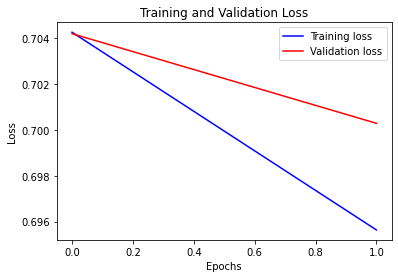

In [ ]:
def visualize_loss(history, title):
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    #accuracy = history.
    epochs = range(len(loss))
    plt.figure()
    plt.plot(epochs, loss, "b", label="Training loss")
    plt.plot(epochs, val_loss, "r", label="Validation loss")
    plt.title(title)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()


visualize_loss(history, "Training and Validation Loss")

**********

### Validation

In [ ]:
for batch_ in dataset_val.take(1):
  val_inputs, val_targets = batch_

val_loss, val_acc, val_auc = model.evaluate(val_inputs, val_targets)

print('Validation loss:', val_loss)
print('Validation accuracy:', val_acc)
print('Validation AUC:', val_auc)

2/2 [==============================] - 1s 10ms/step - loss: 0.6943 - accuracy: 0.5156 - auc: 0.5430
Validation loss: 0.6942905187606812
Validation accuracy: 0.515625
Validation AUC: 0.5430107116699219


*********

### Hyperparameter Tuning

For our purpose, we use a model builder function to define our model. The model builder function returns a compiled model and uses hyperparameters you define inline to hypertune the model.

In [ ]:
def model_builder(hp):
  
  inputs = keras.layers.Input(shape=(30, 10)) 
  
  # Tune the number of units in the first Dense layer
  # Choose an optimal value between 32-512
  hp_units = hp.Int('units', min_value=16, max_value=64, step=16)

  lstm_out = keras.layers.LSTM(units=hp_units)(inputs)
  outputs = keras.layers.Dense(1, activation = 'sigmoid')(lstm_out)

  model = keras.Model(inputs=inputs, outputs=outputs)

  # Tune the learning rate for the optimizer
  # Choose an optimal value from {0.01, 0.001}
  hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3])

  model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate), 
                loss="binary_crossentropy",
                metrics=['accuracy','AUC'])
  return model

********

### Instantiating the tuner and perform hypertuning
The Hyperband tuning algorithm uses adaptive resource allocation and early-stopping to quickly converge on a high-performing model. This is done using a sports championship style bracket. The algorithm trains a large number of models for a few epochs and carries forward only the top-performing half of models to the next round. Hyperband determines the number of models to train in a bracket by computing $1 + log_{factor}(max\_epochs)$ and rounding it up to the nearest integer.

In [ ]:
!pip install -q -U keras-tuner
import keras_tuner as kt

In [ ]:
tuner = kt.Hyperband(model_builder,
                     objective='val_loss',
                     max_epochs=2,
                     factor=3,
                     directory='my_dir',
                     project_name='intro_to_kt')

INFO:tensorflow:Reloading Oracle from existing project my_dir/intro_to_kt/oracle.json
INFO:tensorflow:Reloading Tuner from my_dir/intro_to_kt/tuner0.json


Creating a callback to stop training early after reaching a certain value for the validation loss.

In [ ]:
import tensorflow as tf
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

Running the hyperparameter search. The arguments for the search method are the same as those used for tf.keras.model.fit in addition to the callback above.

In [ ]:
tuner.search(dataset_train, epochs=2, validation_data=dataset_val, callbacks=[stop_early])

# Get the optimal hyperparameters
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

print("")

print(f"""
The hyperparameter search is complete. The optimal number of units in the first RNN layer
layer is {best_hps.get('units')} and the optimal learning rate for the optimizer
is {best_hps.get('learning_rate')}.
""")

INFO:tensorflow:Oracle triggered exit


The hyperparameter search is complete. The optimal number of units in the first RNN layer
layer is 32 and the optimal learning rate for the optimizer
is 0.001.



In [ ]:
# Build the model with the optimal hyperparameters and train it on the data for 50 epochs
model = tuner.hypermodel.build(best_hps)
history = model.fit(dataset_train, epochs=50, validation_data=dataset_val)

Epoch 1/50
78/78 [==============================] - 13s 86ms/step - loss: 0.6967 - accuracy: 0.5028 - auc: 0.5010 - val_loss: 0.6977 - val_accuracy: 0.4990 - val_auc: 0.4977
Epoch 2/50
78/78 [==============================] - 5s 58ms/step - loss: 0.6944 - accuracy: 0.5106 - auc: 0.5118 - val_loss: 0.6973 - val_accuracy: 0.4966 - val_auc: 0.4944
Epoch 3/50
78/78 [==============================] - 5s 60ms/step - loss: 0.6920 - accuracy: 0.5246 - auc: 0.5330 - val_loss: 0.6974 - val_accuracy: 0.4932 - val_auc: 0.4952
Epoch 4/50
78/78 [==============================] - 5s 57ms/step - loss: 0.6906 - accuracy: 0.5232 - auc: 0.5375 - val_loss: 0.7001 - val_accuracy: 0.5034 - val_auc: 0.4977
Epoch 5/50
78/78 [==============================] - 4s 52ms/step - loss: 0.6903 - accuracy: 0.5325 - auc: 0.5417 - val_loss: 0.7021 - val_accuracy: 0.5049 - val_auc: 0.4998
Epoch 6/50
78/78 [==============================] - 4s 51ms/step - loss: 0.6889 - accuracy: 0.5373 - auc: 0.5481 - val_loss: 0.6996 - 

Finding the best number of epochs for which the accuracy metric of our model is the highest.

In [ ]:
# Find the optimal number of epochs
val_acc_per_epoch = history.history['val_accuracy']
# We select the number of epochs for which the accuracy is highest
best_epoch = val_acc_per_epoch.index(max(val_acc_per_epoch)) + 1
print('Best epoch: %d' % (best_epoch,))

Best epoch: 46


Re-instantiating the hypermodel and train it with the optimal number of epochs from above.

In [ ]:
model = tuner.hypermodel.build(best_hps)

# Retrain the model
history = model.fit(dataset_train, epochs=best_epoch, validation_data=dataset_val)

Epoch 1/46
78/78 [==============================] - 6s 46ms/step - loss: 0.6971 - accuracy: 0.5040 - auc: 0.5061 - val_loss: 0.7100 - val_accuracy: 0.5223 - val_auc: 0.4883
Epoch 2/46
78/78 [==============================] - 3s 36ms/step - loss: 0.6921 - accuracy: 0.5216 - auc: 0.5287 - val_loss: 0.6982 - val_accuracy: 0.5097 - val_auc: 0.4910
Epoch 3/46
78/78 [==============================] - 3s 36ms/step - loss: 0.6905 - accuracy: 0.5381 - auc: 0.5410 - val_loss: 0.6948 - val_accuracy: 0.5019 - val_auc: 0.4922
Epoch 4/46
78/78 [==============================] - 3s 36ms/step - loss: 0.6903 - accuracy: 0.5317 - auc: 0.5408 - val_loss: 0.6986 - val_accuracy: 0.5053 - val_auc: 0.4964
Epoch 5/46
78/78 [==============================] - 3s 36ms/step - loss: 0.6912 - accuracy: 0.5282 - auc: 0.5385 - val_loss: 0.6965 - val_accuracy: 0.5024 - val_auc: 0.4962
Epoch 6/46
78/78 [==============================] - 3s 37ms/step - loss: 0.6889 - accuracy: 0.5373 - auc: 0.5500 - val_loss: 0.6948 - v

In [ ]:
for batch_ in dataset_val.take(1):
  val_inputs, val_targets = batch_

val_loss, val_acc, val_auc = model.evaluate(val_inputs, val_targets)

print('Validation loss:', val_loss)
print('Validation accuracy:', val_acc)
print('Validation AUC:', val_auc)

#x = history.evaluate

2/2 [==============================] - 1s 11ms/step - loss: 0.7200 - accuracy: 0.4688 - auc: 0.4712
Validation loss: 0.7199827432632446
Validation accuracy: 0.46875
Validation AUC: 0.471163272857666


********

### Testing

In [ ]:
X_test = X_test[selected_features]


In [ ]:
dataset_test = keras.preprocessing.timeseries_dataset_from_array(
    X_test,
    Y_test,
    sequence_length=sequence_length,
    sampling_rate=step,
    batch_size=batch_size,
    seed=24
)

for batch in dataset_test.take(1):
    inputs, targets = batch

targets = pd.DataFrame(targets)
print("Input shape:", inputs.shape)
print("Target shape:", targets.shape)

Input shape: (64, 30, 10)
Target shape: (64, 1)


In [ ]:
inputs, targets = batch
test_loss, test_acc, test_auc = model.evaluate(inputs, targets)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)
print('Test AUC:', test_auc)

2/2 [==============================] - 0s 11ms/step - loss: 1.1683 - accuracy: 0.4688 - auc: 0.5745
Test loss: 1.1682701110839844
Test accuracy: 0.46875
Test AUC: 0.5745097994804382
